# Galat Numerik
Metode numerik adalah cara pendekatan untuk memecahkan masalah matematika. Metode ini digunakan dalam berbagai bidang, termasuk sains, teknik, ekonomi, dan sebagainya. Meskipun metode numerik sangat berguna dan efektif, namun metode ini tidak sepenuhnya akurat karena mempunyai galat error, yang disebut galat numerik (*numerical error*). Sehingga galat numerik merupakan salah satu faktor penting dalam metode numerik. 

Galat numerik (*numerical error*) adalah ketidaktepatan atau penyimpangan dari nilai sebenarnya ketika melakukan komputasi matematika menggunakan metode numerik atau algoritma. Meskipun metode numerik merupakan alat yang powerful untuk menyelesaikan masalah matematika, tetapi metode ini melibatkan aproksimasi dan estimasi, dan tidak akurat secara mutlak. Oleh karena itu, galat numerik dapat terjadi karena beberapa alasan, termasuk:
1. Galat pembulatan: Ini terjadi karena presisi terbatas dari komputer yang digunakan untuk perhitungan. Komputer hanya dapat menyimpan jumlah digit yang terbatas, sehingga beberapa digit mungkin dipotong atau dibulatkan, menyebabkan kesalahan kecil dalam hasil perhitungan.

2. Galat pemangkasan: Ini terjadi ketika algoritma atau metode memangkas deret atau fungsi tak hingga menjadi jumlah terbatas. Pemangkasan ini menyebabkan galat, yang mungkin signifikan jika jumlah term yang digunakan terlalu kecil. Untuk keterangan lebih lanjut tentang galat ini, akan kita jelaskan pada deret taylor

3. Galat diskritisasi: Ini terjadi ketika masalah kontinu diaproksimasi menjadi diskrit. Hal ini sering terjadi dalam simulasi numerik sistem fisik, di mana variabel kontinu sistem diskritisasi menjadi elemen terbatas atau titik grid.

4. Galat konvergensi: Ini terjadi ketika terdapat perbedaan antara solusi yang mencapai konvegen sepenuhnya dengan solusi yang baru mencapai konvergensi sebagian. Hal ini dapat terjadi karena user menghentikan iterasi sebelum solusi mencapai konvergensi, atau user memilih nilai toleransi galat yang terlalu besar.

## Pengukuran Galat
Karena definisi galat adalah perbedaan nilai estimasi dengan nilai sesungguhnya, maka galat bisa kita tulis dalam rumus:
 


$$ e_t = a - \hat{a} \label{eq:true-error} $$


Karena yang kita ukur adalah perbedaan antara nilai sesungguhnya (*a*) dan nilai estimasi ($ \hat{a} $), maka galat atau kesalahan ini kita sebut sebagi *true error* ($a_t$). 


### Contoh 1
Hitunglah luas lingkaran dengan jari-jari $ r = 2 $ dengan metode numerik dan analitik, serta hitung galat sejati (*true error*).

### Jawab


*Cara 1: Analitik*

Untuk mengitung luas lingkaran dengan cara analitik ($A$), kita bisa menggunakan rumus analitis yang menghasilkan:

In [3]:
import math
r = 2

Aa = math.pi * r *r
print(Aa)

12.566370614359172


$ A = \pi r^2 = 12.566  $

*Cara 2: Numerik*

Seandainya kita membagi lingkaran menjadi segita-segitiga sama kaki berjumlah $n = 10$ dan bersudut antara kaki adalah $\theta = {\pi / 5}$ (lihat gambar). Maka kita bisa menghitung luasan segitiga ($A_3$) sebagai:

In [34]:
n = 10
theta = 2* math.pi/n
A3 = math.sin(theta/2)*math.cos(theta/2)*r*r
An = n * A3
print(A3, ", ", An)

1.175570504584946 ,  11.75570504584946


$ \hat{A} = r^2 \sin(\theta/2)*\cos(\theta/2) = 11.7557$

In [35]:
import matplotlib.pyplot as plt

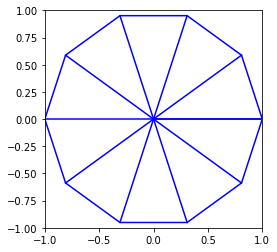

In [36]:
# Menggambar lingkaran dari poligon sisi n
n = 10    # jumlah sudut lingkaran, ingat jumlah titik dalam poligon adalah n + 1
                                            # Tambahkan jumlah sudut n agar lingkarannya semakin halus
th = [i*2*math.pi/n for i in range(n+1)]    # membuat list sudut masing-masing titik pada poligon dari sumbu x positif, 
                                            # ingat mengukur sudut positif adalah berlawanan arah jarum jam
x8 = [math.cos(alpha) for alpha in th]      # list proyeksi sumbu x dari titik-titik poligon
y8 = [math.sin(alpha) for alpha in th]      # list proyeksi sumbu y dari titik-titik poligon

fig, ax = plt.subplots()
ax.plot(x8,y8, 'b')
ax.axis("scaled")
ax.axis([-1,1,-1,1]) 

for i in range(len(x8)):
    x = [0, x8[i]]
    y = [0, y8[i]]
    ax.plot(x,y, 'b')

In [37]:
et = Aa - An 
print (et)

0.8106655685097124


*Galat sejati*
Galat sejati didapatkan dengan memasukkan hasil perhitungan luas analitik dan numerik ke Persamaan \ref{eq:true-error}, sehingga didapat $e_t = 0.8107$.

Jika kita merasa galat tersebut masih cukup besar, kita bisa menambah jumlah pias, sehingga kita peroleh: 

In [39]:
import numpy as np
import matplotlib.pyplot as plt 
import math

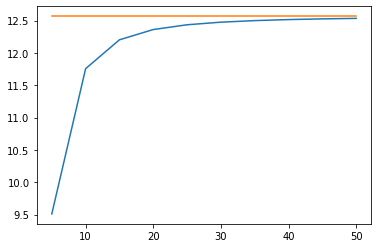

In [56]:
n = np.linspace(5, 50, 10)
theta = 2* math.pi/n 
An = [n[i] * math.sin(theta[i]/2)*math.cos(theta[i]/2)*r*r for i in range(len(n))] # Luas numerik
At = [math.pi*r**2 for i in range(len(n))]
fig, ax = plt.subplots()
ax.plot(n, An)
ax.plot(n, At)





Dibanyak tempat, kita ingin mengukur kesalahan terhadap nilai sebenarnya, yaitu:

$$ \epsilon_t = {a - \hat{a} \over a} $$ 

atau

$$ \epsilon_t = {a - \hat{a} \over a} 100\% $$  

kesalahan ini disebut *true relative error* ($\epsilon_t$). Pada banyak kasus nilai eksak tidak bisa diperoleh, sehingga perlu cara lain untuk mengukur galat. Biasanya pada kasus ini (nilai eksak tidak bisa diperoleh), nilai pendekatan diperoleh dengan cara iterasi hingga solusi mencapai konvergen. Kesalahan/galat pada tiap-tiap iterasi disebut approximation relative  error ($\epsilon_a$) dan bisa dihitung menggunakan:

$$ \epsilon_a = {\hat{a}^{i} - \hat{a}^{i-1} \over \hat{a}^i} 100\% $$  

dengan *i* adalah iterasi saat ini dan *i-1* dalah iterasi sebelumnya. Kesalahan-kesalahan di atas bisa bernilai negatif jika nilai eksak lebih kecil dari nilai pendekatan atau nilai iterasi saat ini lebih kecil dari nilai iterasi sebelumnya. Untuk menghindari nilai negatif biasanya digunakan nilai absolut, yaitu $\lvert \epsilon_t \rvert$ atau $\lvert{\epsilon_a}\rvert$. Jika solusi diperoleh dengan cara iterasi, biasa iterasi akan dihentikan jika nilai absolutnya lebih kecil dari nilai toleransi ($\epsilon_s$).

$$ \lvert \epsilon_a \rvert \le \epsilon_s $$

## Cara mengurangi galat
Galat numerik dapat diminimalkan dengan menggunakan metode numerik yang cocok untuk masalah yang dipecahkan, menggunakan aritmetika presisi tinggi, meningkatkan jumlah term yang digunakan dalam aproksimasi, atau dengan menggunakan teknik analisis galat untuk menentukan sumber-sumber galat dan memperbaikinya. Penting untuk menyadari galat numerik dan mengambil langkah-langkah untuk meminimalkannya, karena galat ini dapat menyebabkan ketidakakuratan yang signifikan pada hasil akhir.

Penting untuk diingat bahwa galat pada metode numerik tidak bisa dihilangkan sepenuhnya, namun dapat diperkecil sebanyak mungkin dengan menggunakan teknik-teknik yang tepat. Oleh karena itu, sangat penting bagi para ilmuwan dan ahli matematika untuk memahami konsep galat pada metode numerik dan menggunakan teknik yang tepat untuk mengurangi galat tersebut agar hasil perhitungan yang diperoleh dapat digunakan secara efektif dan akurat dalam berbagai aplikasi.